KNN Accuracy: 0.94


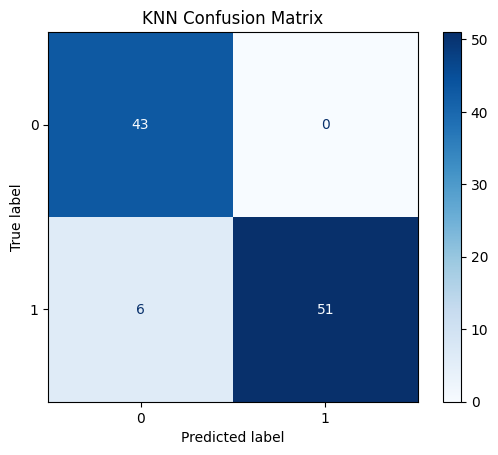

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.89      0.94        57

    accuracy                           0.94       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.94      0.94       100



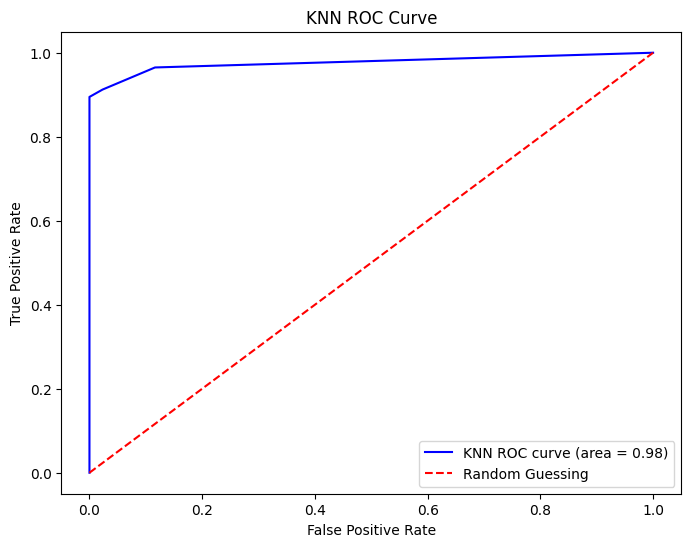

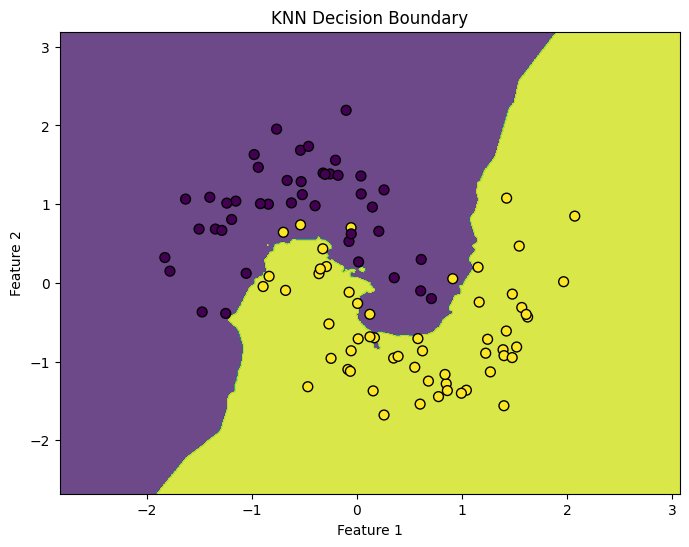

In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons, make_classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve, auc, RocCurveDisplay


# Generate synthetic dataset
X,y = make_moons(n_samples=500, noise=0.25, random_state=42)

# Visualize the dataset
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
# plt.title("Synthetic Moons Dataset Visualization")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred_knn)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp_cm.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

# Classification Report
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Visualize ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label='KNN ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    plt.figure(figsize=(8, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundary for KNN
plot_decision_boundary(knn, X_test, y_test, title="KNN Decision Boundary")